<a href="https://colab.research.google.com/github/ema12246/Tpfinal-datos/blob/main/tp_final_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importamos las librerias que estaremos utilizando

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler

Importamos el archivo csv en un Dataframe de pandas

In [ ]:
wine_data = pd.read_csv("winequality-red_TF.csv")
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Convertimos la columna "quality" en binaria

In [ ]:
wine_data.loc[wine_data['quality'] < 7, 'quality'] = 0
wine_data.loc[wine_data['quality'] >= 7, 'quality'] = 1
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


Mostrar la informacion general del dataframe

In [ ]:
wine_data.info(), wine_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1552 non-null   float64
 8   pH                    1520 non-null   float64
 9   sulphates             1440 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


(None,
        fixed acidity  volatile acidity  citric acid  residual sugar  \
 count    1599.000000       1599.000000  1599.000000     1599.000000   
 mean        8.319637          0.527821     0.270976        2.538806   
 std         1.741096          0.179060     0.194801        1.409928   
 min         4.600000          0.120000     0.000000        0.900000   
 25%         7.100000          0.390000     0.090000        1.900000   
 50%         7.900000          0.520000     0.260000        2.200000   
 75%         9.200000          0.640000     0.420000        2.600000   
 max        15.900000          1.580000     1.000000       15.500000   
 
          chlorides  free sulfur dioxide  total sulfur dioxide      density  \
 count  1599.000000          1599.000000           1599.000000  1552.000000   
 mean      0.087467            15.874922             46.467792     0.996743   
 std       0.047065            10.460157             32.895324     0.001886   
 min       0.012000        

Vemos cuantas veces aparece cada valor en esa variable

In [ ]:
wine_data['quality'].value_counts()

,count
quality,
0,1382
1,217


box plot

In [ ]:
def plot(plot, x, y, title, ylabel):
  plt.figure(figsize=(12, 8))

  match plot:
    case 'box':
      sns.boxplot(data=wine_data, x=x, y=y)
    case 'violin':
      sns.violinplot(data=wine_data, x=x, y=y)

  plt.title(title)
  plt.xlabel('')
  plt.xticks([0, 1], ['el vino es bueno', 'el vino es malo'])
  plt.ylabel(ylabel)
  plt.show()

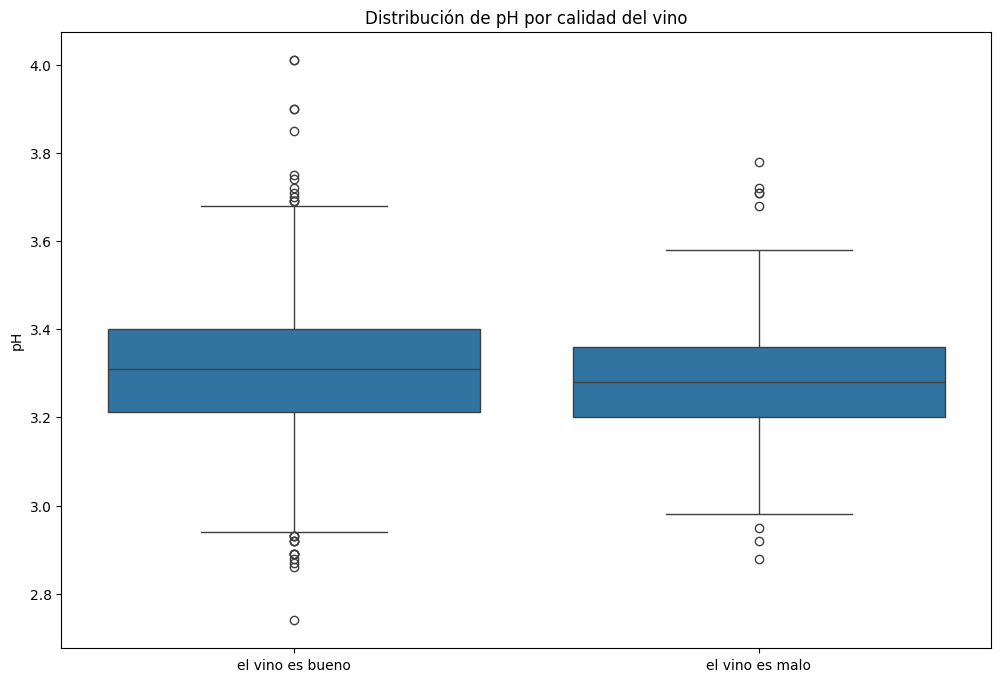

In [ ]:
plot('box', 'quality', 'pH', 'Distribución de pH por calidad del vino', 'pH')

Grafica de violin

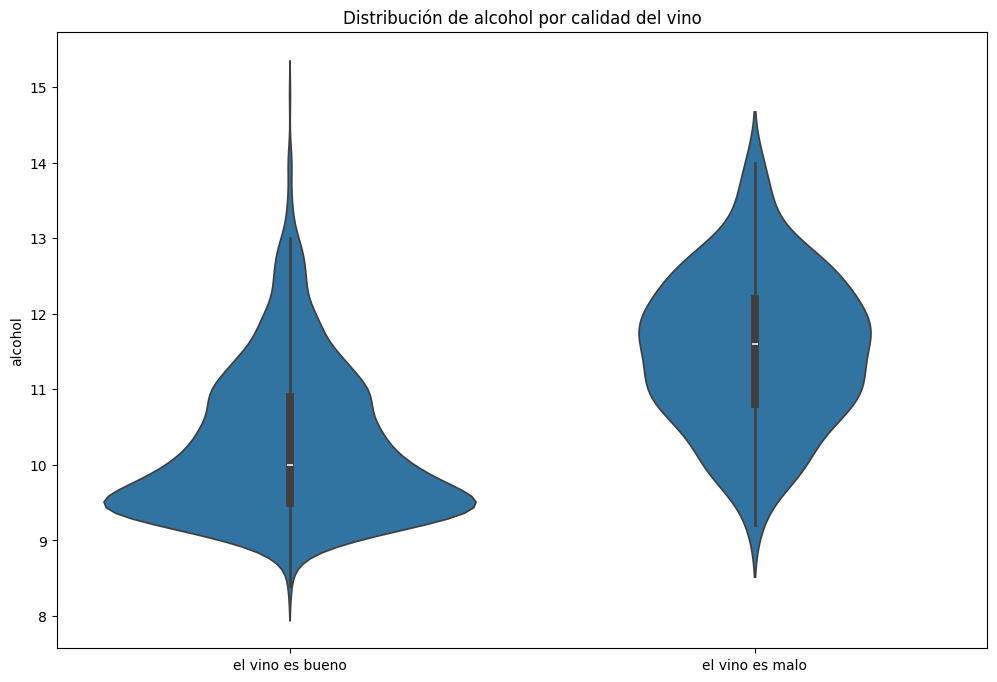

In [ ]:
plot('violin', 'quality', 'alcohol', 'Distribución de alcohol por calidad del vino', 'alcohol')

Vemos si hay valores nulos

In [ ]:
print(wine_data.isnull().sum())

fixed acidity             0
volatile acidity          0
citric acid               0
residual sugar            0
chlorides                 0
free sulfur dioxide       0
total sulfur dioxide      0
density                  47
pH                       79
sulphates               159
alcohol                   0
quality                   0
dtype: int64


### Sacamos la media,mediana y un histograma de cada columna con valores nulos

Density:

In [ ]:
#media
wine_data['density'].mean()

np.float64(0.996742712628866)

In [ ]:
#mediana
wine_data['density'].median()

0.99673

<Axes: >

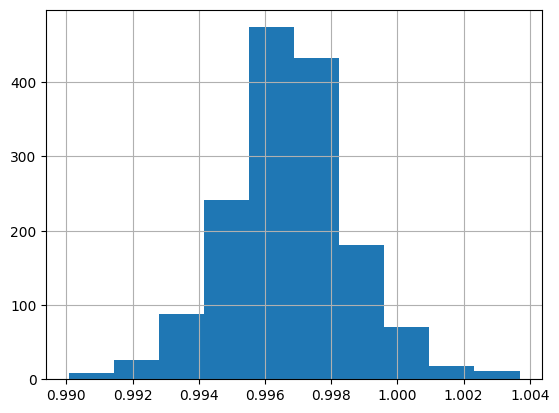

In [ ]:
#histograma
wine_data['density'].hist()

vemos el porcentaje que ocupa la columna en el dataframe

In [ ]:
print(len(wine_data[wine_data['density'].isna()]) / len(wine_data) * 100)

2.9393370856785492


In [ ]:
reeemplazamos los valores nulos por la media de la columna

In [ ]:
wine_data['density'] = wine_data['density'].fillna(wine_data['density'].mean())

pH:

In [ ]:
#media
wine_data['pH'].mean()

np.float64(3.3088223684210525)

In [ ]:
#mediana
wine_data['pH'].median()

3.31

<Axes: >

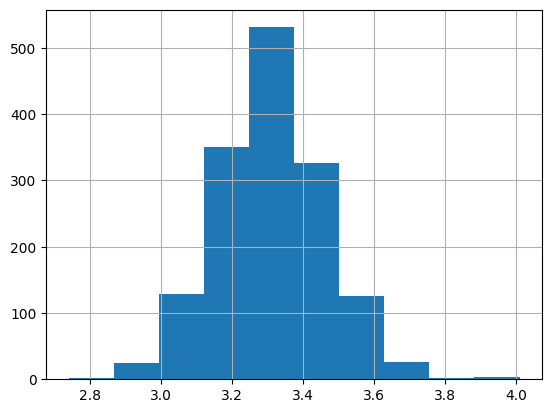

In [ ]:
#histograma
wine_data['pH'].hist()

vemos el porcentaje que ocupa la columna en el dataframe

In [ ]:
print(len(wine_data[wine_data['pH'].isna()]) / len(wine_data) * 100)

4.940587867417136


reemplazamos los valores nulos por la media

In [ ]:
wine_data['pH'] = wine_data['pH'].fillna(wine_data['pH'].mean())

sulphates:

In [ ]:
#media
wine_data['sulphates'].mean()

np.float64(0.6578611111111111)

In [ ]:
#mediana
wine_data['sulphates'].median()

0.62

<Axes: >

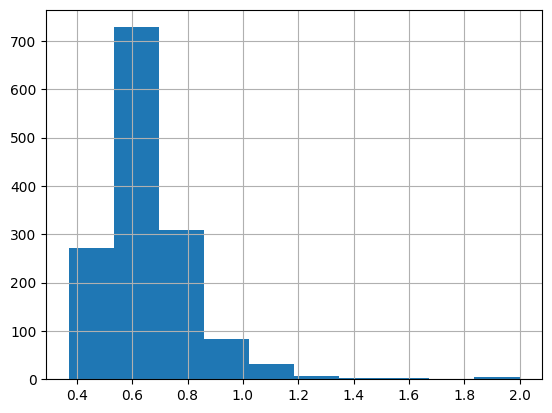

In [ ]:
#histograma
wine_data['sulphates'].hist()

Vemos el porcentaje que ocupa la columna en el dataframe

In [ ]:
print(len(wine_data[wine_data['sulphates'].isna()]) / len(wine_data) * 100)

9.943714821763603


Reemplazamos los valores nulos por la media

In [ ]:
wine_data['sulphates'] = wine_data['sulphates'].fillna(wine_data['sulphates'].mean())

### Outliers

In [ ]:
def get_outliers(column):
  q1 = wine_data[column].quantile(0.25)
  q3 = wine_data[column].quantile(0.75)

  iqr = q3 - q1

  lower_end = q1 - 1.5 * iqr
  upper_end = q3 + 1.5 * iqr

  return len(wine_data[(wine_data[column] < lower_end) | (wine_data[column] > upper_end)])

data = {'column': [], 'outliers': [], 'outliers_percentage': []}

for column in wine_data.columns[:-1]:
  outliers = get_outliers(column)

  data['column'].append(column)
  data['outliers'].append(outliers)
  data['outliers_percentage'].append(outliers / len(wine_data) * 100)

outliers = pd.DataFrame(data)
outliers = outliers.sort_values('outliers_percentage', ascending=False)
outliers = outliers.reset_index(drop=True)

print(outliers.to_markdown(index=False))

| column               |   outliers |   outliers_percentage |
|:---------------------|-----------:|----------------------:|
| residual sugar       |        155 |             9.69356   |
| chlorides            |        112 |             7.00438   |
| sulphates            |         71 |             4.44028   |
| total sulfur dioxide |         55 |             3.43965   |
| fixed acidity        |         49 |             3.06442   |
| density              |         45 |             2.81426   |
| pH                   |         41 |             2.5641    |
| free sulfur dioxide  |         30 |             1.87617   |
| volatile acidity     |         19 |             1.18824   |
| alcohol              |         13 |             0.813008  |
| citric acid          |          1 |             0.0625391 |


Graficamos un mapa de calor para ver que columnas son necesrias y cuales no

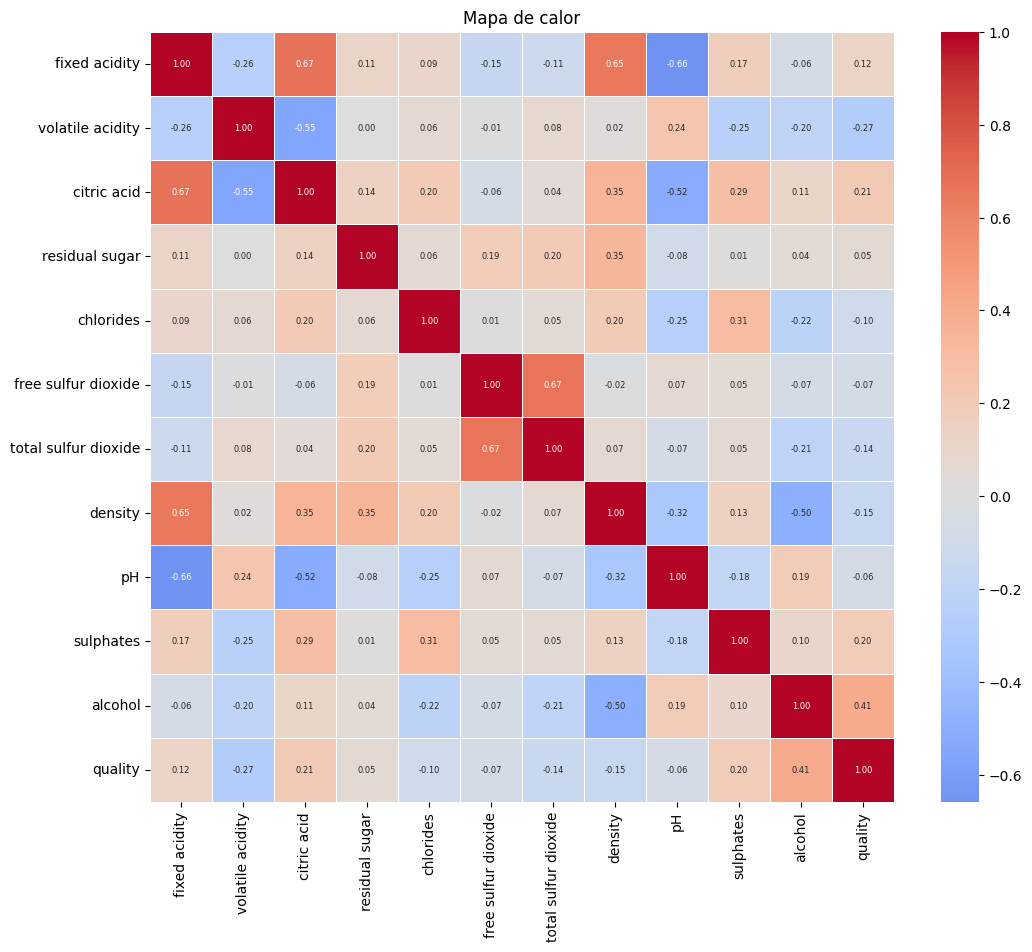

In [ ]:
plt.figure(figsize=(12, 10))

sns.heatmap(
    wine_data.corr(),
    cmap='coolwarm',
    center=0,
    fmt='.2f',
    annot=True,
    annot_kws={'size': 6},
    linewidths=0.5
)

plt.title('Mapa de calor')
plt.show()

Eliminamos las columnas que consideramos innecesarias

In [ ]:
wine_data = wine_data.drop('residual sugar', axis=1)

In [ ]:
wine_data = wine_data.drop('free sulfur dioxide', axis=1)

Definimos la variable objetivo

In [ ]:
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

Oversampling

In [ ]:
ros = RandomOverSampler()
X_res, y_res = ros.fit_resample(X, y)

Dividimos los dato en conjuntos de entrenamiento y prueba

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

Escalamos los datos numericos

In [ ]:
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

Iniciacion del modelo, en este caso: random forest

In [ ]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
random_forest_accuracy = accuracy_score(y_test, y_pred)
random_forest_precision = precision_score(y_test, y_pred)
random_forest_recall = recall_score(y_test, y_pred)
random_forest_f1_score = f1_score(y_test, y_pred)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.91      0.96       291
           1       0.91      1.00      0.95       262

    accuracy                           0.95       553
   macro avg       0.96      0.96      0.95       553
weighted avg       0.96      0.95      0.95       553



Matriz de confusión

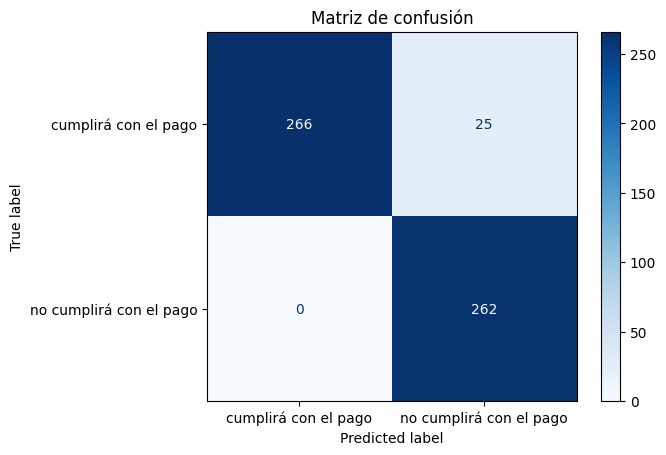

In [ ]:
confussion_matrix = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=confussion_matrix, display_labels=['el vino es bueno', 'el vino es malo'])
disp.plot(cmap='Blues')
plt.title('Matriz de confusión')
plt.show()

Iniciación del modelo, en este caso decision tree:

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
decision_tree_accuracy = accuracy_score(y_test, y_pred)
decision_tree_precision = precision_score(y_test, y_pred)
decision_tree_recall = recall_score(y_test, y_pred)
decision_tree_f1_score = f1_score(y_test, y_pred)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94       291
           1       0.89      1.00      0.94       262

    accuracy                           0.94       553
   macro avg       0.94      0.94      0.94       553
weighted avg       0.95      0.94      0.94       553



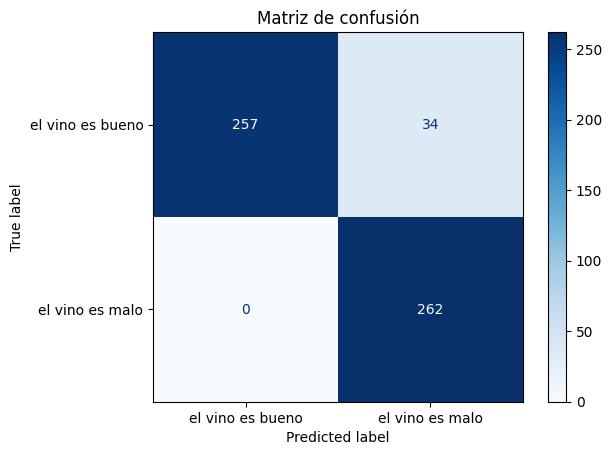

In [ ]:
confussion_matrix = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=confussion_matrix, display_labels=['el vino es bueno', 'el vino es malo'])
disp.plot(cmap='Blues')
plt.title('Matriz de confusión')
plt.show()

Visualización de resultados

In [ ]:
performance = pd.DataFrame(
    {
      'model': ['Random forest', 'Decision tree'],
      'accuracy': [random_forest_accuracy, decision_tree_accuracy],
      'precision': [random_forest_precision, decision_tree_precision],
      'recall': [random_forest_recall, decision_tree_recall],
      'f1 score': [random_forest_f1_score, decision_tree_f1_score]
    }
)

print(performance.to_markdown(index=False))

| model         |   accuracy |   precision |   recall |   f1 score |
|:--------------|-----------:|------------:|---------:|-----------:|
| Random forest |   0.954792 |    0.912892 |        1 |   0.954463 |
| Decision tree |   0.938517 |    0.885135 |        1 |   0.939068 |


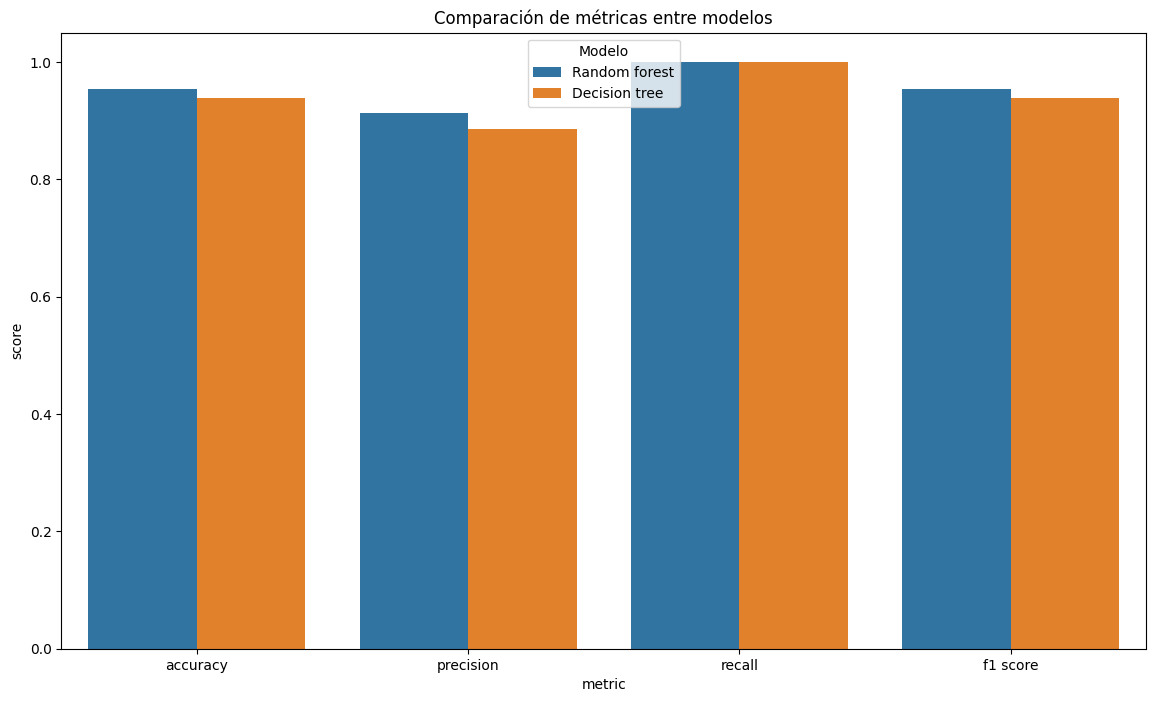

In [ ]:
performance = performance.melt(id_vars='model', var_name='metric', value_name='score')

plt.figure(figsize=(14, 8))
sns.barplot(x='metric', y='score', hue='model', data=performance)
plt.title('Comparación de métricas entre modelos')
plt.legend(title='Modelo')
plt.show()